### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import normal_ad
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data Loading

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
df.isnull().sum().sort_values(ascending = True)

id                                 0
temperatureLow                     0
temperatureLowTime                 0
apparentTemperatureHigh            0
apparentTemperatureHighTime        0
apparentTemperatureLow             0
apparentTemperatureLowTime         0
icon                               0
dewPoint                           0
pressure                           0
windBearing                        0
cloudCover                         0
uvIndex                            0
visibility.1                       0
ozone                              0
sunriseTime                        0
sunsetTime                         0
moonPhase                          0
precipIntensityMax                 0
uvIndexTime                        0
temperatureMin                     0
temperatureMinTime                 0
temperatureMax                     0
temperatureMaxTime                 0
apparentTemperatureMin             0
apparentTemperatureMinTime         0
temperatureHighTime                0
a

In [5]:
df.shape

(693071, 57)

In [6]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [7]:
df_copy = df.copy()

## DATA CLEANING

In [8]:
numerical_columns = list(df_copy.select_dtypes(include=['int64']).columns.values) + list(df_copy.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(df_copy.select_dtypes(include=['object']))

In [9]:
# cetak variabel yang numerik
numerical_columns

['hour',
 'day',
 'month',
 'windGustTime',
 'temperatureHighTime',
 'temperatureLowTime',
 'apparentTemperatureHighTime',
 'apparentTemperatureLowTime',
 'windBearing',
 'uvIndex',
 'sunriseTime',
 'sunsetTime',
 'uvIndexTime',
 'temperatureMinTime',
 'temperatureMaxTime',
 'apparentTemperatureMinTime',
 'apparentTemperatureMaxTime',
 'timestamp',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'visibility',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'dewPoint',
 'pressure',
 'cloudCover',
 'visibility.1',
 'ozone',
 'moonPhase',
 'precipIntensityMax',
 'temperatureMin',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']

In [10]:
# cetak variabel yang kategorikal
categorical_columns


['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [11]:
# Mengetahui jumlah 'unknown' di setiap atribut
df_copy[df_copy[categorical_columns]=='unknown'].count().sort_values(ascending=False)

apparentTemperatureMaxTime     0
visibility                     0
windGust                       0
windSpeed                      0
humidity                       0
precipProbability              0
precipIntensity                0
long_summary                   0
short_summary                  0
apparentTemperature            0
temperature                    0
longitude                      0
latitude                       0
surge_multiplier               0
distance                       0
price                          0
name                           0
product_id                     0
cab_type                       0
destination                    0
source                         0
timezone                       0
datetime                       0
month                          0
day                            0
hour                           0
timestamp                      0
windGustTime                   0
temperatureHigh                0
apparentTemperatureMax         0
temperatur

In [12]:
df_copy[df_copy[categorical_columns]=='unknown'] = np.nan

In [13]:
df_copy[df_copy[categorical_columns]=='unknown'].count().sort_values(ascending=False)

apparentTemperatureMaxTime     0
visibility                     0
windGust                       0
windSpeed                      0
humidity                       0
precipProbability              0
precipIntensity                0
long_summary                   0
short_summary                  0
apparentTemperature            0
temperature                    0
longitude                      0
latitude                       0
surge_multiplier               0
distance                       0
price                          0
name                           0
product_id                     0
cab_type                       0
destination                    0
source                         0
timezone                       0
datetime                       0
month                          0
day                            0
hour                           0
timestamp                      0
windGustTime                   0
temperatureHigh                0
apparentTemperatureMax         0
temperatur

In [14]:
df_copy[categorical_columns].head()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


In [15]:
# Mencetak semua nilai unik pada masing-masing kolom kategori
for cat_col in categorical_columns:
    print('Nilai unik untuk kolom ', cat_col.upper())
    print(df_copy[cat_col].unique())
    print('='*30)

Nilai unik untuk kolom  ID
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
Nilai unik untuk kolom  DATETIME
['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 07:15:07' '2018-11-30 05:23:02' '2018-11-29 17:38:01']
Nilai unik untuk kolom  TIMEZONE
['America/New_York']
Nilai unik untuk kolom  SOURCE
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
Nilai unik untuk kolom  DESTINATION
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']
Nilai unik untuk kolom  CAB_TYPE
['Lyft

In [16]:
df_copy[numerical_columns].head()

,hour,day,month,windGustTime,temperatureHighTime,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,windBearing,uvIndex,...,pressure,cloudCover,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,1545015600,1544968800,1545048000,1544968800,1545044400,57,0,...,1021.98,0.72,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,1543291200,1543251600,1543298400,1543251600,1543291200,90,0,...,1003.97,1.00,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,1543334400,1543320000,1543402800,1543320000,1543392000,240,0,...,992.28,0.03,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,1543514400,1543510800,1543579200,1543510800,1543575600,310,0,...,1013.73,0.00,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,1543446000,1543420800,1543478400,1543420800,1543460400,303,0,...,998.36,0.44,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [17]:
for num_col in numerical_columns:
    print('Nilai unik untuk kolom', num_col.upper())
    print(df_copy[num_col].unique())
    print('='*30)

Nilai unik untuk kolom HOUR
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]
Nilai unik untuk kolom DAY
[16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
Nilai unik untuk kolom MONTH
[12 11]
Nilai unik untuk kolom WINDGUSTTIME
[1545015600 1543291200 1543334400 1543514400 1543446000 1545022800
 1543287600 1543755600 1543856400 1543338000 1543554000 1543431600
 1544738400 1543672800 1545127200 1544918400 1544846400 1543860000
 1543557600 1543305600 1543597200 1544371200 1544634000 1543939200
 1543150800]
Nilai unik untuk kolom TEMPERATUREHIGHTIME
[1544968800 1543251600 1543320000 1543510800 1543420800 1545076800
 1543255200 1543788000 1543852800 1543600800 1543438800 1544731200
 1544990400 1543690800 1545159600 1544896800 1544814000 1543784400
 1544378400 1544637600 1543939200 1543942800 1543154400]
Nilai unik untuk kolom TEMPERATURELOWTIME
[1545048000 1543298400 1543402800 1543579200 1543478400 1545130800
 1543816800 1543921200 1543399200 1543665600 154348560

[42.34 43.58 38.33 34.38 37.44 38.75 41.99 49.88 45.58 45.45 40.13 41.47
 20.38 32.85 41.29 31.25 43.49 36.99 40.36 42.95 24.71 37.11 42.42 42.02
 40.4  40.68 44.94 39.75 45.35 48.83 43.73 48.23 45.82 38.54 34.81 39.02
 38.95 42.5  27.93 45.84 34.4  41.09 43.96 47.95 41.16 32.07 43.51 36.5
 43.65 47.27 41.3  48.12 39.35 43.61 57.22 33.15 18.97 40.43 46.66 40.92
 38.74 25.21 31.8  48.43 52.1  37.83 35.98 49.7  47.56 38.61 40.38 20.01
 40.47 37.95 37.28 18.91 41.6  40.29 24.61 34.26 42.81 37.26 41.35 46.3
 54.62 31.87 37.92 45.69 41.   46.36 26.21 42.27 25.55 29.05 38.41 50.43
 46.78 19.28 43.91 41.91 42.25 48.45 35.54 32.31 46.23 54.38 39.13 43.99
 30.8  27.71 53.51 44.15 33.71 34.87 44.34 20.07 42.21 20.42 42.11 42.01
 45.16 44.93 41.19 38.19 35.95 29.36 43.02 43.64 31.74 40.77 36.89 38.18
 38.42 49.11 35.68 41.24 30.58 40.33 40.39 41.94 53.34 45.78 38.6  46.62
 49.34 42.08 40.7  40.86 40.78 41.82 40.08 37.71 31.24 46.91 41.43 26.47
 36.27 43.38 40.88 40.61 52.9  42.23 41.34 48.11 31.5

[37.95 43.92 44.12 38.53 35.75 34.97 43.81 50.13 56.35 44.01 40.48 36.75
 40.53 32.85 38.38 38.21 43.99 38.39 43.85 22.75 38.3  43.84 35.88 53.62
 44.15 43.71 50.06 50.27 36.58 53.8  43.44 57.2  52.19 36.57 53.73 22.69
 40.95 49.7  38.85 43.93 32.84 36.09 41.38 44.06 22.96 36.77 38.4  43.86
 35.95 36.56 56.6  56.75 43.32 44.24 32.95 29.98 50.45 38.34 36.55 50.32
 44.14 56.37 44.05 38.51 43.88 43.78 36.11 38.35 38.93 43.98 40.51 56.85
 39.02 53.81 56.22 36.21 43.38 32.82 43.82 22.87 43.97 43.7  38.29 44.13
 32.93 38.37 22.9  38.44 22.62 32.68 38.45 53.77 44.09 43.74 38.36 40.69
 53.79 30.42 35.93 36.6  43.83 38.28 22.77 53.76 43.9  30.27 33.04 31.62
 40.61 56.41 33.11 50.11 43.87 35.91 31.97 29.83 38.68 41.84 53.71 28.95
 30.25 36.54 43.21 43.17]
Nilai unik untuk kolom APPARENTTEMPERATURELOW
[27.39 36.2  29.11 26.2  30.29 12.04 37.08 45.62 28.53 30.19 28.1  32.25
 28.06 24.61 28.3  26.41 35.69 28.21 29.97 14.29 27.26 36.7  11.99 35.18
 30.13 38.78 45.64 45.53 38.58 27.95 31.97 35.08 35.

In [18]:
# missing values pada data train
print('Jumlah nan missing values atribut kategori = ',df_copy[categorical_columns].isnull().sum().sum())
print('Jumlah nan missing values atribut numerikal = ',df_copy[numerical_columns].isnull().sum().sum())

Jumlah nan missing values atribut kategori =  0
Jumlah nan missing values atribut numerikal =  55095


In [19]:
df_copy = df_copy.dropna(subset = ['price']).reset_index()

In [20]:
df_copy.isnull().sum()

index                          0
id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatur

In [21]:
df_copy = df_copy.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing', 'index',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'timezone','product_id',
       'precipIntensityMax','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
       'id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
       'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
       'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime',
       'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
df_copy

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary,icon,visibility.1
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.0330,Mostly Cloudy,partly-cloudy-night,10.000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.0330,Rain,rain,4.786
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,Clear,clear-night,10.000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,Clear,clear-night,10.000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,Partly Cloudy,partly-cloudy-night,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,23,1,12,West End,North End,Uber,WAV,9.5,1.00,1.0,42.3519,-71.0643,Partly Cloudy,partly-cloudy-night,9.785
637972,23,1,12,West End,North End,Uber,UberXL,13.0,1.00,1.0,42.3519,-71.0643,Partly Cloudy,partly-cloudy-night,9.785
637973,23,1,12,West End,North End,Uber,UberX,9.5,1.00,1.0,42.3519,-71.0643,Partly Cloudy,partly-cloudy-night,9.785
637974,23,1,12,West End,North End,Uber,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,Partly Cloudy,partly-cloudy-night,9.785


In [22]:
df_copy.shape

(637976, 15)

In [23]:
new_category = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon',
 'price',
 'hour',
 'distance',
 'surge_multiplier']
new_df = df_copy[new_category]
new_df.head()

,source,destination,cab_type,name,short_summary,icon,price,hour,distance,surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0,9,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0,2,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0,1,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0,4,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0,3,0.44,1.0


### CENTRAL TENDENCY

Pada analisis statistik ini, kami ingin mengetahui persebaran data dari kolom distance karena secara umum distance dapat dikatakan sebagai faktor yang memengaruhi harga dari sebuah taxi online. Seperti yang diketahui bahwa semakin dekat jarak ke tempat tujuan, maka tarif dari taxi online pun juga semakin murah, begitu juga sebaliknya.

In [24]:
#Mean
print('Rata-rata distance:',new_df.distance.mean())
# Median
print('Median dari distance:',new_df.distance.median())
#Modus
print('Mode dari distance:',new_df.distance.mode()[0])

Rata-rata distance: 2.189261100730992
Median dari distance: 2.16
Mode dari distance: 2.66


### MEASURE OF SPREAD

In [25]:
#Range
print('Range dari distance:',new_df.distance.max()-new_df.distance.min())
#Standard Deviation
print('Standard deviation dari distance:',new_df.distance.std())
#Variance
print('Variance dari distance:',new_df.distance.var())

Range dari distance: 7.840000000000001
Standard deviation dari distance: 1.1354130181864042
Variance dari distance: 1.28916272186716


### EKSPLORASI DATA

In [26]:
new_df

,source,destination,cab_type,name,short_summary,icon,price,hour,distance,surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0,9,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0,2,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0,1,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0,4,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0,3,0.44,1.0
...,...,...,...,...,...,...,...,...,...,...
637971,West End,North End,Uber,WAV,Partly Cloudy,partly-cloudy-night,9.5,23,1.00,1.0
637972,West End,North End,Uber,UberXL,Partly Cloudy,partly-cloudy-night,13.0,23,1.00,1.0
637973,West End,North End,Uber,UberX,Partly Cloudy,partly-cloudy-night,9.5,23,1.00,1.0
637974,West End,North End,Uber,Black SUV,Partly Cloudy,partly-cloudy-night,27.0,23,1.00,1.0


In [27]:
max_threshold = new_df['price'].quantile(0.99)
max_threshold

42.5

In [28]:
new_df[new_df['price']>max_threshold]

,source,destination,cab_type,name,short_summary,icon,price,hour,distance,surge_multiplier
645,South Station,Back Bay,Lyft,Lux Black,Partly Cloudy,partly-cloudy-night,52.5,10,3.25,2.00
646,South Station,Back Bay,Lyft,Lux Black XL,Partly Cloudy,partly-cloudy-night,67.5,2,3.25,2.00
706,Theatre District,Boston University,Lyft,Lux Black XL,Partly Cloudy,partly-cloudy-day,45.5,17,4.76,1.00
1005,Theatre District,Fenway,Lyft,Lux Black XL,Light Rain,rain,45.5,17,4.31,1.00
1210,Financial District,Boston University,Lyft,Lux Black XL,Overcast,cloudy,45.5,16,5.33,1.00
...,...,...,...,...,...,...,...,...,...,...
637394,Financial District,Boston University,Uber,Black SUV,Mostly Cloudy,partly-cloudy-day,47.0,20,5.56,1.00
637637,Financial District,Fenway,Lyft,Lux Black XL,Partly Cloudy,partly-cloudy-night,52.5,10,4.58,1.25
637813,Financial District,Boston University,Lyft,Lux Black XL,Foggy,fog,47.5,5,5.42,1.00
637878,Back Bay,North End,Uber,Black SUV,Mostly Cloudy,partly-cloudy-night,51.0,4,7.36,1.00


In [29]:
min_threshold = new_df['price'].quantile(0.01)
min_threshold

3.5

In [30]:
new_df[new_df['price']<min_threshold]

,source,destination,cab_type,name,short_summary,icon,price,hour,distance,surge_multiplier
8,Back Bay,Northeastern University,Lyft,Shared,Foggy,fog,3.0,6,1.08,1.0
50,Haymarket Square,West End,Lyft,Shared,Partly Cloudy,partly-cloudy-day,3.0,18,0.71,1.0
159,Back Bay,Fenway,Lyft,Shared,Possible Drizzle,rain,3.0,13,1.40,1.0
312,North End,North Station,Lyft,Shared,Overcast,cloudy,3.0,6,1.02,1.0
361,Haymarket Square,West End,Lyft,Shared,Overcast,cloudy,3.0,23,0.64,1.0
...,...,...,...,...,...,...,...,...,...,...
637611,South Station,North Station,Lyft,Shared,Possible Drizzle,rain,3.0,13,1.69,1.0
637660,Boston University,West End,Lyft,Shared,Overcast,cloudy,3.0,17,3.08,1.0
637705,North Station,Haymarket Square,Lyft,Shared,Overcast,cloudy,3.0,19,0.70,1.0
637779,Theatre District,Northeastern University,Lyft,Shared,Partly Cloudy,partly-cloudy-night,3.0,21,3.13,1.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

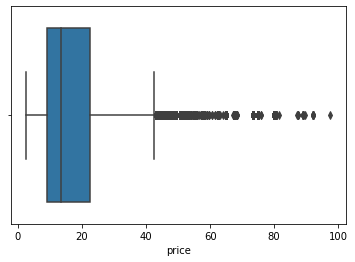

In [31]:
sns.boxplot(new_df['price'])

In [32]:
out = np.where(new_df['price'] > 43)
print(out[0])
print(np.count_nonzero(np.where(new_df['price'] > 43)))

[   645    646    706 ... 637813 637878 637917]
5357


In [33]:
new_df.drop(out[0], inplace = True)
new_df.shape

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(632619, 10)

In [34]:
pd.set_option('display.max_rows', 72)
new_df.groupby(by=['source','destination']).price.agg(['mean'])

mean
source                  destination                       
Back Bay                Boston University        13.873539
                        Fenway                   13.508119
                        Haymarket Square         17.649189
                        North End                18.972243
                        Northeastern University  13.002950
                        South Station            17.250640
Beacon Hill             Boston University        16.289265
                        Fenway                   16.050577
                        Haymarket Square         13.753669
                        North End                15.178168
                        Northeastern University  16.327289
                        South Station            15.817474
Boston University       Back Bay                 13.903533
                        Beacon Hill              17.131651
                        Financial District       22.590484
                        North Station            19.778860
                        Theatre District         18.411849
                        West End                 18.305241
Fenway                  Back Bay                 13.700805
                        Beacon Hill              16.630176
                        Financial District       22.124707
                        North Station            19.279088
                        Theatre District         17.943720
                        West End                 17.920495
Financial District      Boston University        22.641500
                        Fenway                   22.392608
                        Haymarket Square         13.137591
                        North End                13.129630
                        Northeastern University  20.746471
                        South Station            12.318602
Haymarket Square        Back Bay                 16.831653
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.322982
                        Theatre District         13.673462
                        West End                 12.520126
North End               Back Bay                 19.505426
                        Beacon Hill              15.968385
                        Financial District       13.417597
                        North Station            12.811001
                        Theatre District         15.162366
                        West End                 13.489332
North Station           Boston University        18.846428
                        Fenway                   18.518802
                        Haymarket Square         12.553797
                        North End                13.093300
                        Northeastern University  19.394348
                        South Station            15.347896
Northeastern University Back Bay                 13.601921
                        Beacon Hill              16.705088
                        Financial District       21.733708
                        North Station            19.412622
                        Theatre District         15.998303
                        West End                 17.868134
South Station           Back Bay                 18.884775
                        Beacon Hill              17.138639
                        Financial District       12.397365
                        North Station            15.650857
                        Theatre District         13.879610
                        West End                 15.807947
Theatre District        Boston University        19.173286
                        Fenway                   18.644472
                        Haymarket Square         15.079999
                        North End                15.033104
                        Northeastern University  16.684205
                        South Station            12.770020
West End                Boston University 

In [35]:
df_uber = new_df[new_df['cab_type']=='Uber']
df_lyft = new_df[new_df['cab_type']=='Lyft']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


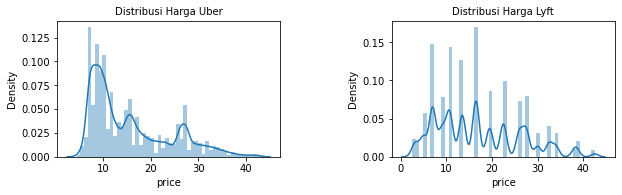

In [36]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(3,2,1)
sns.distplot(df_uber['price'])
ax.set_title("Distribusi Harga Uber", fontsize=10)

ax = fig.add_subplot(3,2,2)
sns.distplot(df_lyft['price'])
ax.set_title("Distribusi Harga Lyft", fontsize=10)

plt.show()

In [37]:
print('Average price of Uber:', df_uber.price.mean())
print('Standart deviation price of Uber:', df_uber.price.std())

print('Average price of Lyft:', df_lyft.price.mean())
print('Standart deviation price of Lyft:', df_lyft.price.std())

Average price of Uber: 15.671794669347076
Standart deviation price of Uber: 8.335973673676936
Average price of Lyft: 16.88843526223476
Standart deviation price of Lyft: 9.201886370848252


1. rata-rata harga dari Uber adalah 15.672 dengan standar deviasi sebesar 8.34.
2. rata-rata harga dari Lyft adalah 16.889 dengan standar deviasi sebesar 9.20

### DATA PREPROCESSING

In [38]:
new_category = ['source',
 'destination',
 'cab_type',
 'surge_multiplier',
 'name',
 'short_summary',
 'icon',
 'price',
 'hour',
 'distance']
new_df = df_copy[new_category]
new_df.head()

,source,destination,cab_type,surge_multiplier,name,short_summary,icon,price,hour,distance
0,Haymarket Square,North Station,Lyft,1.0,Shared,Mostly Cloudy,partly-cloudy-night,5.0,9,0.44
1,Haymarket Square,North Station,Lyft,1.0,Lux,Rain,rain,11.0,2,0.44
2,Haymarket Square,North Station,Lyft,1.0,Lyft,Clear,clear-night,7.0,1,0.44
3,Haymarket Square,North Station,Lyft,1.0,Lux Black XL,Clear,clear-night,26.0,4,0.44
4,Haymarket Square,North Station,Lyft,1.0,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0,3,0.44


In [39]:
from sklearn.preprocessing import OneHotEncoder
cat_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)

#intiate OneHotEncoder and concatinating original df with encoded column df's
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(new_df[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    new_df = new_df.drop(col, axis=1)
    new_df = pd.concat([new_df, enc_df], axis=1)

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


In [40]:
# importing module
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [41]:
y = new_df['price'].values
X = new_df.drop(columns=['price'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#### Skala Data

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)
X_test

array([[-0.15859507,  0.05434   ,  0.16696871, ...,  2.23588908,
        -0.54351758, -0.42103766],
       [-0.15859507, -0.37710193, -1.29499537, ..., -0.44724938,
         1.83986689, -0.42103766],
       [-0.15859507, -0.37710193,  0.67777544, ..., -0.44724938,
         1.83986689, -0.42103766],
       ...,
       [-0.15859507,  1.06103782,  0.56328428, ..., -0.44724938,
        -0.54351758, -0.42103766],
       [-0.15859507,  0.05434   ,  2.03405537, ..., -0.44724938,
         1.83986689, -0.42103766],
       [-0.15859507,  0.48578192,  2.81787948, ..., -0.44724938,
        -0.54351758, -0.42103766]])

### PENDEFINISIAN MODEL

In [44]:
LR = LinearRegression()
model = LR.fit(X_train,y_train)
y_pred = model.predict(X_test)

#### Slope

In [45]:
print('slope:', model.coef_)

slope: [ 1.78217491e+00  3.84413094e-03  3.28184351e+00  2.10183673e+11
  2.09555207e+11  4.47937221e+11  4.48712847e+11  2.12134996e+11
  4.47262681e+11  4.46322747e+11  2.08691358e+11  4.47771580e+11
  4.47960061e+11  2.10269408e+11  2.10079117e+11  1.55946508e+11
  1.54927850e+11  3.92944572e+11  3.94817250e+11  1.56639341e+11
  3.93356259e+11  3.92828987e+11  1.54545369e+11  3.92632883e+11
  3.93481650e+11  1.55791940e+11  1.55742353e+11  8.10576536e+11
  6.68558204e+11  1.82601999e+11  1.82438685e+11  9.93020286e+10
  9.94286610e+10  9.92835422e+10  9.93785631e+10  9.94273431e+10
  9.94826738e+10  1.82136103e+11  1.82187706e+11  1.82342387e+11
  1.82353588e+11  2.47920835e+12 -2.33115027e+11  2.64854986e+11
 -6.12482208e+11  1.62364966e+12  1.20157041e+12  1.54231146e+12
 -3.66818972e+11 -4.11485123e+11 -5.90394804e+11 -8.63075577e+11
  8.45235598e+11  2.35134459e+11  1.58351669e+11  1.78267274e+11
  2.38742498e+12]


### PELATIHAN MODEL

In [46]:
print('skor r2 adalah', r2_score(y_test, y_pred))

skor r2 adalah 0.9293698989557577


In [47]:
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

6.0890652074557465
2.4676031300546986


In [48]:
Rsquared = r2_score(y_test, y_pred)
Rsquared

0.9293698989557577

### KESIMPULAN

1. Rata-rata harga dari Uber adalah 15.672 dengan standar deviasi sebesar 8.34. Artinya, persebaran harga dari Uber berada di antara [7.332, 24.012]. Sementara itu, rata-rata harga dari Lyft adalah 16.889 dengan standar deviasi sebesar 9.20. Artinya, persebaran harga dari Lyft berada di antara [7.689, 26.089].
2. Berdasarkan hasil dari linear regresi didapatkan akurasi sebesar 92,93% untuk data training. Artinya, 92,93% attribut price dapat direpresentasikan oleh atribut distance, surge_multiplier, cab_type, name, short_summary. Selain itu, model ini juga dapat dikatakan baik untuk digunakan dalam prediksi harga taxi online (Uber dan Lyft) karena akurasinya mendekati 100%.